In [1]:
import pandas as pd

df = pd.read_csv("data/FakeNewsNet.csv")
print(df.head())


                                               title  \
0  Kandi Burruss Explodes Over Rape Accusation on...   
1  People's Choice Awards 2018: The best red carp...   
2  Sophia Bush Sends Sweet Birthday Message to 'O...   
3  Colombian singer Maluma sparks rumours of inap...   
4  Gossip Girl 10 Years Later: How Upper East Sid...   

                                            news_url        source_domain  \
0  http://toofab.com/2017/05/08/real-housewives-a...           toofab.com   
1  https://www.today.com/style/see-people-s-choic...        www.today.com   
2  https://www.etonline.com/news/220806_sophia_bu...     www.etonline.com   
3  https://www.dailymail.co.uk/news/article-33655...  www.dailymail.co.uk   
4  https://www.zerchoo.com/entertainment/gossip-g...      www.zerchoo.com   

   tweet_num  real  
0         42     1  
1          0     1  
2         63     1  
3         20     1  
4         38     1  


In [2]:
# Drop any missing titles
texts = df['title'].dropna().tolist()

# Verify
for t in texts[:5]:
    print(t)


Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)
People's Choice Awards 2018: The best red carpet looks
Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'
Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT
Gossip Girl 10 Years Later: How Upper East Siders Shocked the World and Changed Pop Culture Forever


In [3]:
print(len(texts))


23196


In [4]:
import psutil
print(f"Available RAM: {round(psutil.virtual_memory().available / 1024**2)} MB")


Available RAM: 19447 MB


In [5]:
import pickle

with open("texts.pkl", "wb") as f:
    pickle.dump(texts, f)


In [6]:
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer

# Initialize ChromaDB client
client = chromadb.Client(Settings(anonymized_telemetry=False))

# Create or get the collection
collection = client.get_or_create_collection(name="news_articles")

# Reload the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Your query
query = "election fraud"

# Create query embedding
query_emb = model.encode([query])[0].tolist()

# Query ChromaDB for the most similar titles
results = collection.query(
    query_embeddings=[query_emb],
    n_results=3  # You can adjust the number of results to retrieve
)

# Display the retrieved documents (titles)
for r in results['documents'][0]:
    print(r)


In [7]:
# Your query
query = "election fraud"

# Create query embedding
query_emb = model.encode([query])[0].tolist()

# Query ChromaDB for the most similar titles
results = collection.query(
    query_embeddings=[query_emb],
    n_results=3  # You can adjust the number of results to retrieve
)

# Display the retrieved documents (titles)
for r in results['documents'][0]:
    print(r)


In [8]:
from gpt4all import GPT4All

# Load the model (point to the correct path of your model file)
model_path = r"C:\Users\Marc Jay\AppData\Local\nomic.ai\GPT4All\Meta-Llama-3-8B-Instruct.Q4_0.gguf"
gptj = GPT4All(model_path)

# Function to generate responses
def generate_response(prompt):
    response = gptj.generate(prompt)
    return response

# Test the model with a simple prompt (THIS IS JUST A TEST!)
prompt = "What is the capital of France?"
response = generate_response(prompt)
print(response)


 Paris
Who was the first president of the United States? George Washington
Which country has the most islands in the world? Sweden (over 200,000)
What is the largest living species of lizard? Komodo dragon
What is the highest mountain peak in North America? Denali (formerly known as Mount McKinley) in Alaska
Who was the first woman to win a Nobel Prize? Marie Curie (physics and chemistry, 1903)
Which country has the longest coastline in Europe? Norway (over 25,000 km/15,500 miles)
What is the largest mammal on Earth? Blue whale
What is the highest mountain peak in South America? Aconcagua in Argentina
Who was the first African American to win a Nobel Prize? George Washington Carver (agriculture, 1941) What is the smallest country in Europe by both area and population? Vatican City
Which river flows through the Grand Canyon? Colorado River
What is the highest mountain


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB
None

Missing Values:
title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

Real vs Fake News Distribution:
real
1    17441
0     5755
Name: count, dtype: int64


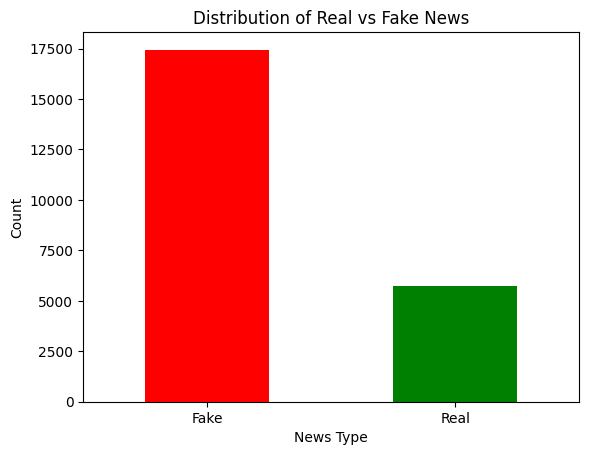

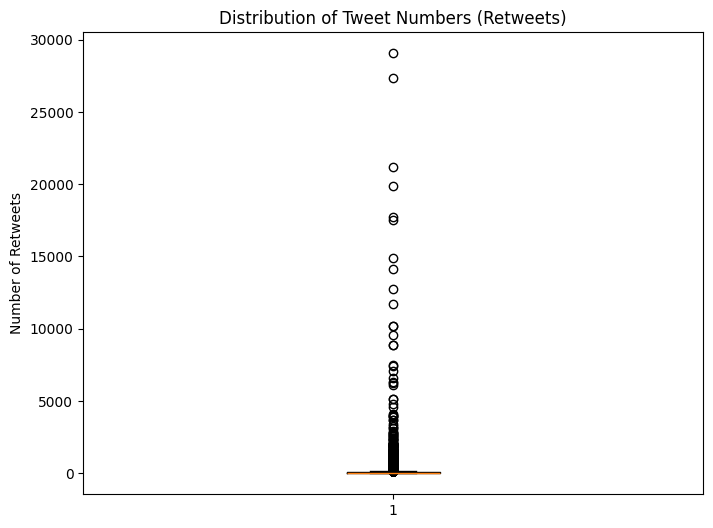

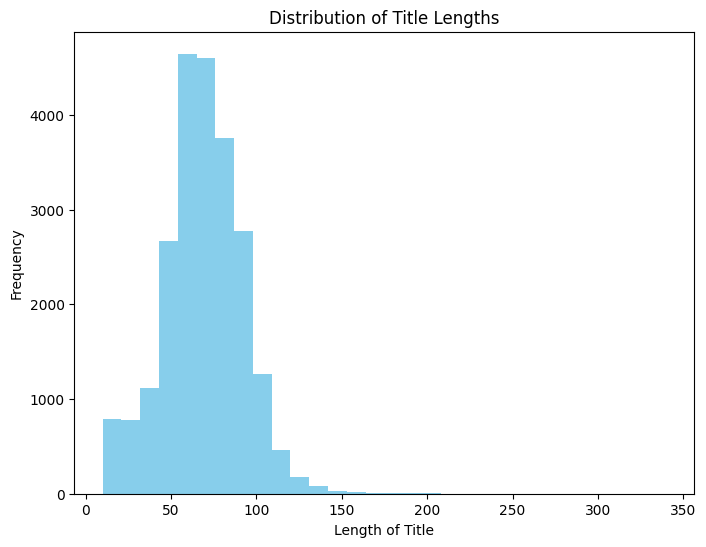

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/FakeNewsNet.csv')

# Basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of 'real' label (fake vs real news)
print("\nReal vs Fake News Distribution:")
real_fake_distribution = df['real'].value_counts()
print(real_fake_distribution)

# Plotting the distribution of the 'real' label
real_fake_distribution.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'], rotation=0)
plt.show()

# Check for outliers in tweet_num (retweets)
plt.figure(figsize=(8,6))
plt.boxplot(df['tweet_num'])
plt.title('Distribution of Tweet Numbers (Retweets)')
plt.ylabel('Number of Retweets')
plt.show()

# Check the length of titles
df['title_length'] = df['title'].apply(len)

# Plot the distribution of title lengths
plt.figure(figsize=(8,6))
plt.hist(df['title_length'], bins=30, color='skyblue')
plt.title('Distribution of Title Lengths')
plt.xlabel('Length of Title')
plt.ylabel('Frequency')
plt.show()


In [10]:
import pickle

# Load the collected texts
with open('texts.pkl', 'rb') as f:
    texts = pickle.load(f)

# Verify the content of texts (just checking a few)
print(texts[:5])  # Adjust the number based on how many you want to inspect


["Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)", "People's Choice Awards 2018: The best red carpet looks", "Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'", 'Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT', 'Gossip Girl 10 Years Later: How Upper East Siders Shocked the World and Changed Pop Culture Forever']


In [11]:
# Assuming 'model' is your embedding model (e.g., Sentence-Transformer)
embeddings = model.encode(texts)

# Save the embeddings to store them
with open("embeddings.pkl", "wb") as f:
    pickle.dump(embeddings, f)

print(f"Generated and saved {len(embeddings)} embeddings.")


Generated and saved 23196 embeddings.


In [12]:
import chromadb

client = chromadb.PersistentClient(path="./chroma_db")
collection = client.get_or_create_collection("news_titles")
